# Issue with contiguity masking Sentinel-2 at 10m resolution

## Sample query

In [2]:
import datacube 

dc = datacube.Datacube()

query = {
    'x': (153.385, 153.39),
    'y': (-28.885, -28.895),
    'time': ('2018-06-09', '2018-06-11'),
    'measurements': ['nbart_green', 'nbart_contiguity'],
    'output_crs': 'EPSG:32756',
    'group_by': 'solar_day'
}


In [27]:
dc.find_datasets(product='s2b_ard_granule', 
             resolution=(-20, 20),
             **query)[0].crs.epsg

32756

## Load and preview data at 20m resolution

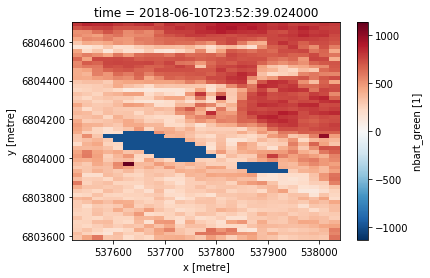

In [9]:
# Load data
ds = dc.load(product='s2b_ard_granule', 
             resolution=(-20, 20),
             **query)

ds.nbart_green.plot()

### Apply contiguity mask
All non-contiguous -999 values are correctly removed at 20m resolution:

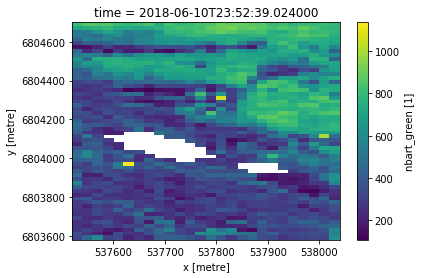

In [10]:
mask = ds.nbart_contiguity == 1
ds_masked = ds.where(mask)
ds_masked.nbart_green.plot()

## Load and preview data at 10m resolution

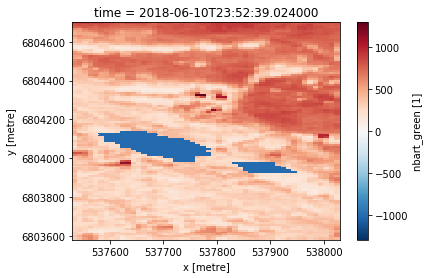

In [24]:
# Load data
ds = dc.load(product='s2b_ard_granule', 
             resolution=(-10, 10),
             **query)

ds.nbart_green.plot()

### Apply contiguity mask
Observe ring of stray -999 values that are not removed by the mask at 10m resolution:

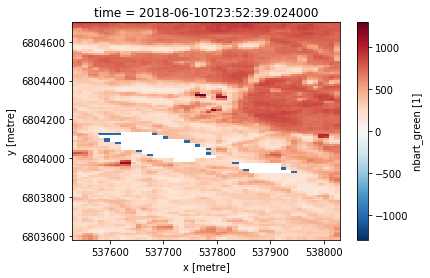

In [25]:
mask = ds.nbart_contiguity == 1
ds_masked = ds.where(mask)
ds_masked.nbart_green.plot()